In [1]:
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_pdf import PdfPages

### Question 1:

In [2]:
from Div import complex_set
from Div import check_divergence

In [3]:
# Define the parameters
n_points = 1000
max_iter = 10
x_max=2
x_min=-2 
y_max=2
y_min=-2

In [4]:
# Calculate the Complex set
divergence_iterations, diverged = complex_set(n_points, max_iter, x_max, x_min, y_max, y_min)

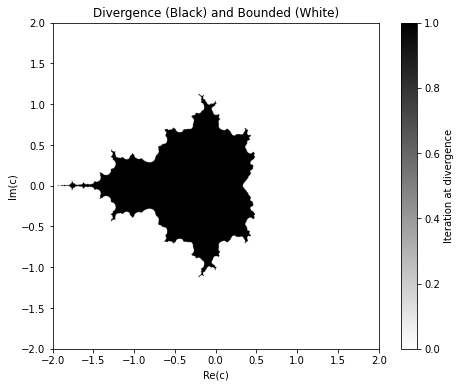

In [5]:
# Plot the divergence image
plt.figure(figsize=(8, 6))
plt.imshow(diverged, extent=(-2, 2, -2, 2), cmap='binary', origin='lower')
plt.title('Divergence (Black) and Bounded (White)')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.colorbar(label='Iteration at divergence')
#plt.savefig("Q1_figure_1.pdf") # save as a pdf file
plt.show()

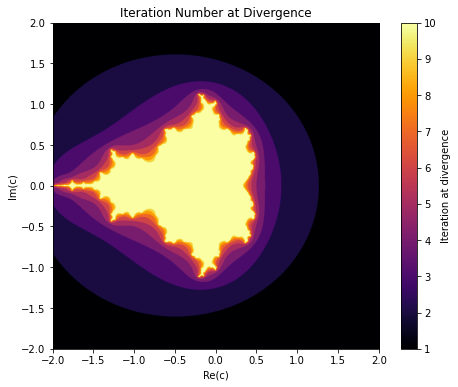

In [6]:
# Plot the iteration number image
plt.figure(figsize=(8, 6))
plt.imshow(divergence_iterations, extent=(-2, 2, -2, 2), cmap='inferno', origin='lower')
plt.title('Iteration Number at Divergence')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.colorbar(label='Iteration at divergence')
#plt.savefig("Q1_figure_2.pdf") # save as a pdf file
plt.show()

### Question 2:

Task 1 & 2:

In [7]:
def Lorenz(t, W, sigma, garmma, beta):
    
    """
    This function compute the derivatives for the Lorenz attractor.

    Parameters:
    
        t (float): Time.
        
        W (list): List containing the values of x, y, and z.
        
        sigma (float): Parameter sigma.
        
        garmma (float): Parameter garmma.
        
        beta (float): Parameter beta.

    Returns:
    
        list: A list containing the derivatives dx/dt, dy/dt, and dz/dt.
    """
    
    x, y, z = W
    
    X_dot = -sigma * (x - y)

    Y_dot = garmma * x - y - x * z 
    
    Z_dot = -beta * z + x * y
    
    return (X_dot, Y_dot, Z_dot)

In [8]:
# Set parameters
sigma, garmma, beta = [10., 28, 8./3]

# Set initial conditions
W_0 = np.array([0.,1.,0.])

# Set time span
t_span = (0, 60)
t_delta = 0.01
N = int(t_span[1]/t_delta)
t_eval = np.linspace(*t_span, N)

In [9]:
# Solve the ODE
sol = solve_ivp(Lorenz, t_span, W_0, args=(sigma, garmma, beta), t_eval=t_eval)

Task 3 reproduce Lorenz's Figure 1. :

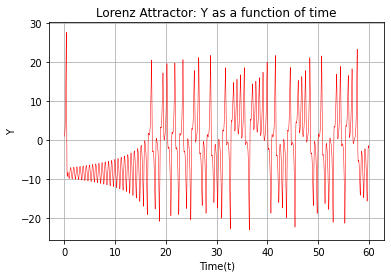

In [10]:
# Plot y as a function of time
plt.plot(sol.t, sol.y[1], color='r', lw=0.5)
plt.xlabel('Time(t)')
plt.ylabel('Y')
plt.title('Lorenz Attractor: Y as a function of time')
plt.grid(True)
#plt.savefig("Q2_figure_1.pdf") # save as a pdf file
plt.show()

Task 4 reproduce Lorenz's Figure 2.

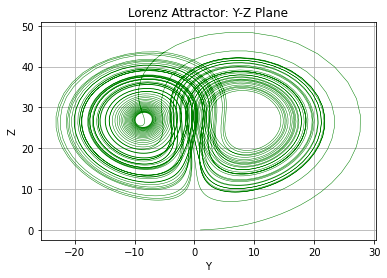

In [11]:
# Plot Y-Z Plane
plt.figure()
plt.plot(sol.y[1], sol.y[2], color='g', lw=0.5)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Lorenz Attractor: Y-Z Plane')
#plt.savefig("Q2_figure_2_1.pdf") # save as a pdf file
plt.grid(True)
plt.show()

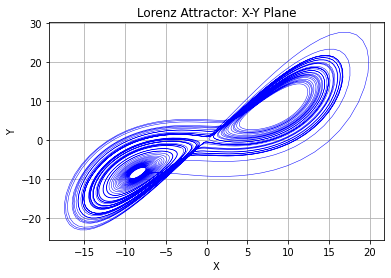

In [12]:
# Plot X-Y Plane
fig = plt.figure()
plt.plot(sol.y[0], sol.y[1], color='b', lw=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lorenz Attractor: X-Y Plane')
plt.grid(True)
#plt.savefig("Q2_figure_2_2.pdf") # save as a pdf file
plt.show()

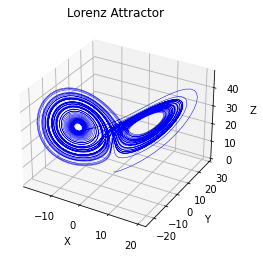

In [13]:
# Plot the 3D solution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], color='b', lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
#plt.savefig("Q2_figure_3.pdf") # save as a pdf file
plt.show()

Task 5: new initial conditions

In [14]:
# Define a function to calculate Euclidean distance between two vectors
def distance(v1, v2):
    """
    This function computes the Euclidean distance between two vectors `v1` and `v2`.
    The Euclidean distance is the straight-line distance between two points in 
    Euclidean space, which is calculated as the L2 norm of the difference between
    the two vectors.

    Parameters:

    v1 : numpy.ndarray
        A 1D array representing the first vector.
    v2 : numpy.ndarray
        A 1D array representing the second vector.

    Returns:
    
    float
        The Euclidean distance between the two vectors `v1` and `v2`.
    """
    return np.linalg.norm(v1 - v2)

In [15]:
# Initial conditions
W_0 = np.array([0., 1., 0.])
W_delta = np.array([0., 1.0e-8, 0.])

# Time array
time = np.linspace(0, 1, 100)  # Assuming time runs from 0 to 1

# Compute distance at each time step
dist = [distance(W_0, np.add(W_0, t * W_delta)) for t in time]

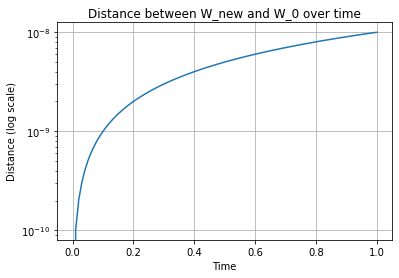

In [16]:
# Plot on a semilog plot
plt.semilogy(time, dist)
plt.xlabel('Time')
plt.ylabel('Distance (log scale)')
plt.title('Distance between W_new and W_0 over time')
plt.grid(True)
#plt.savefig("Q2_figure_4.pdf") # save as a pdf file
plt.show()

### Question 3:

In [17]:
""""with PdfPages('output.pdf') as pdf:
# save all the figure in one pdf file named output.

    # Plot the divergence image
    plt.figure(figsize=(8, 6))
    plt.imshow(diverged, extent=(-2, 2, -2, 2), cmap='binary', origin='lower')
    plt.title('Divergence (Black) and Bounded (White)')
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.colorbar(label='Iteration at divergence')
    pdf.savefig() 
    plt.close()

    # Plot the iteration number image
    plt.figure(figsize=(8, 6))
    plt.imshow(divergence_iterations, extent=(-2, 2, -2, 2), cmap='inferno', origin='lower')
    plt.title('Iteration Number at Divergence')
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.colorbar(label='Iteration at divergence')
    pdf.savefig()
    plt.close()

    # Plot y as a function of time
    plt.figure()
    plt.plot(sol.t, sol.y[1], color='r', lw=0.5)
    plt.xlabel('Time(t)')
    plt.ylabel('Y')
    plt.title('Lorenz Attractor: Y as a function of time')
    plt.grid(True)
    pdf.savefig()
    plt.close()

    # Plot Y-Z Plane
    plt.figure()
    plt.plot(sol.y[1], sol.y[2], color='g', lw=0.5)
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.title('Lorenz Attractor: Y-Z Plane')
    plt.grid(True)
    pdf.savefig()
    plt.close()

    # Plot X-Y Plane
    plt.figure()
    plt.plot(sol.y[0], sol.y[1], color='b', lw=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Lorenz Attractor: X-Y Plane')
    plt.grid(True)
    pdf.savefig()
    plt.close()

    # Plot the 3D solution
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(sol.y[0], sol.y[1], sol.y[2], color='b', lw=0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Lorenz Attractor')
    pdf.savefig(fig)
    plt.close()

    # Plot on a semilog plot
    plt.figure()
    plt.semilogy(time, dist)
    plt.xlabel('Time')
    plt.ylabel('Distance (log scale)')
    plt.title('Distance between W_new and W_0 over time')
    plt.grid(True)
    pdf.savefig()
    plt.close()
""""